In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import preprocessing  
import matplotlib.pyplot as plt

In [4]:
def plot1(data,x,title='acu'):
    if x == 0:
        df = data
    else:
        df=data[data['temp_l']==x]
        
    plt.figure(figsize = (5,4),dpi = 100)
    ax =  plt.gca()
    ax.set_ylim(-2,2)
    plt.scatter(df['time'],df['power_l'],marker='o')
    plt.scatter(df['time'],df['temp_diff'],marker='^')
    plt.title(title)
    
    plt.legend(["power level","temp diff"])
    plt.show()

In [5]:
def plot2(data,x=1,title='acu'):
    # 可按照温差的正负分别观察功率
    if x == 0:
        df = data
    else:
        df=data[data['temp_l']==x]
        
    plt.figure(figsize = (5,4),dpi = 100)
    ax =  plt.gca()
    ax.set_ylim(-2,2)
    plt.scatter(df['time'],df['power_minMax'],marker='o')
    plt.scatter(df['time'],df['temp_diff'],marker='^')
    plt.title(title)
    
    plt.legend(['power_minMax','temp diff'])
    plt.show()

In [6]:
def get_acu_df(df2_file='./-2021061/ACUpowerRJYSZID1.csv'):
    
    df1 = pd.read_csv('./data-20210615-835/4.空调数据.csv')
    df1['time']=df1['time'].apply(lambda x : str(x)[:-4])
    df2 = pd.read_csv(df2_file)
    df2['time']=df2['time'].apply(lambda x : str(x))
    
    acu_list = [i[-4:] for i in df2.columns[1:]]
    
    for id in acu_list:
        acu = df1.loc[df1['acu_id'].str.contains(id),['time','setting_t','return_t']]
        if acu.shape[0]<1:
            print('缺失该空调状态参数:{0}'.format(id))
        else:
            acu = acu.sort_values(by = 'time')
            acu_id = [x for x in df2.columns if id in x]
            df = acu.merge(df2[['time']+acu_id], on='time')
            df.rename(columns={acu_id[0]:'active_power'},inplace=True)

            df['temp_diff'] = df['return_t']-df['setting_t']
            min_max_scaler = preprocessing.MinMaxScaler() 
            df['power_minMax'] = min_max_scaler.fit_transform(df.loc[:,['active_power']])
            #df['temp_minMax'] = min_max_scaler.fit_transform(df.loc[:,['temp_diff']])
            df['power_l']=df['power_minMax'].apply(lambda x: 1 if x>0.5 else -1)
            df['temp_l']=df['temp_diff'].apply(lambda x: 1 if x>0 else -1)
            df['power_lag1']=df['power_l'].shift(1)
            df['time'] = df['time'].apply(lambda x: datetime.strptime(str(x),'%Y%m%d%H'))
            
            power_1 = round(np.percentile(df['active_power'], 25),2)
            power_2 = round(np.percentile(df['active_power'], 75),2) 
            setting_t = df['setting_t'].mode()[0]
            return_t_mean = round(df['return_t'].mean(),2)
            
            title = "acu{0}:setting_t{1},return_t_mean{2},power{3}-{4}".format(id,setting_t,return_t_mean,power_1,power_2)
            # plot1(data=df,x=0,title=title)
            plot2(data=df,x=0,title=title)

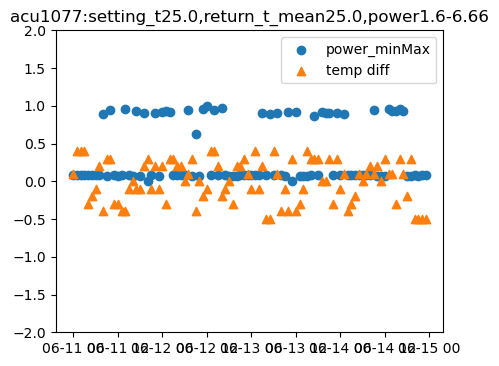

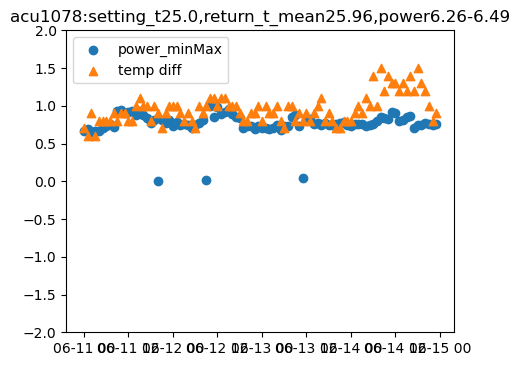

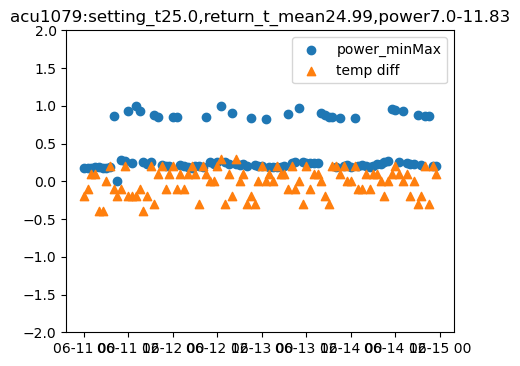

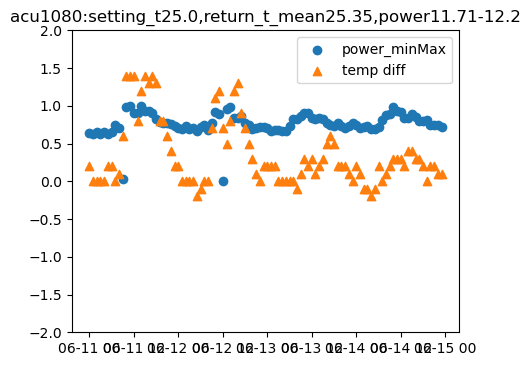

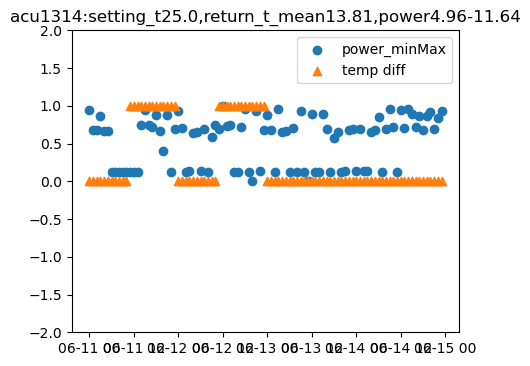

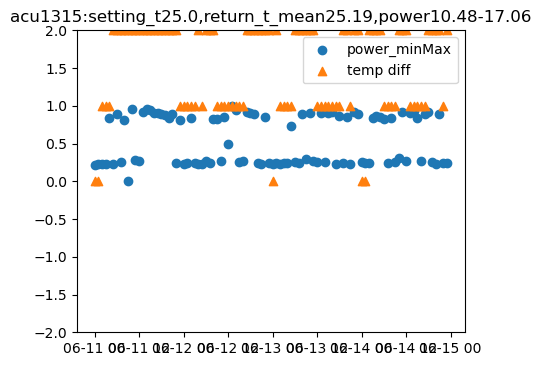

In [7]:
get_acu_df(df2_file='./-2021061/ACUpowerRJYSZID1.csv')

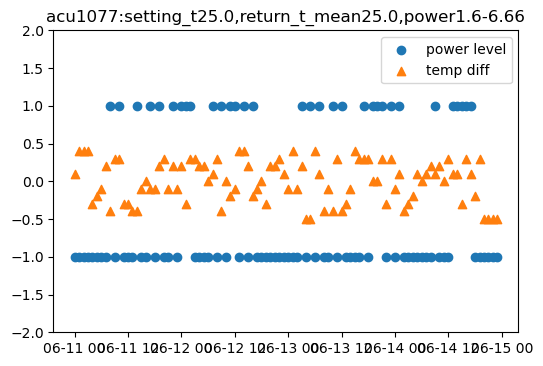

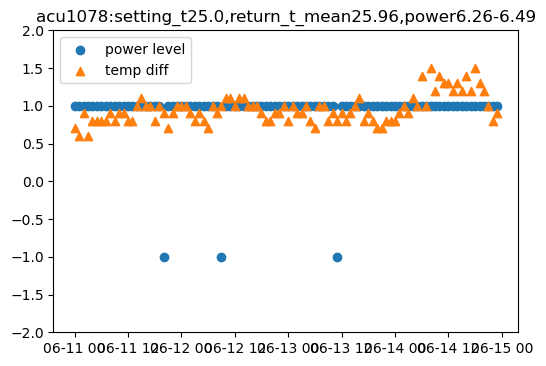

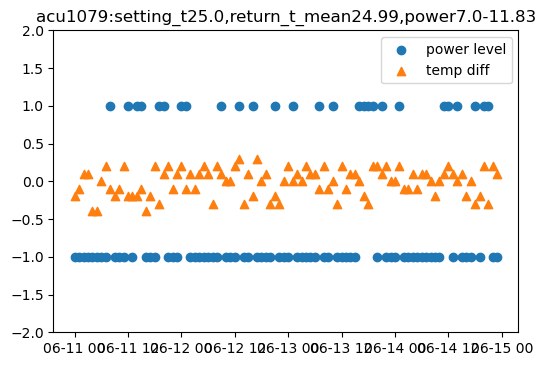

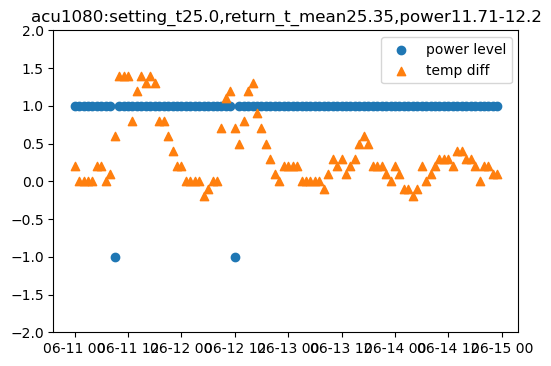

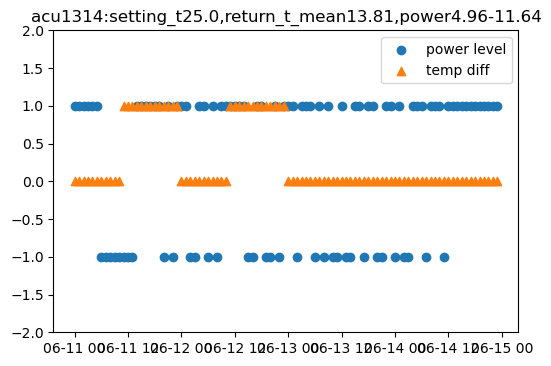

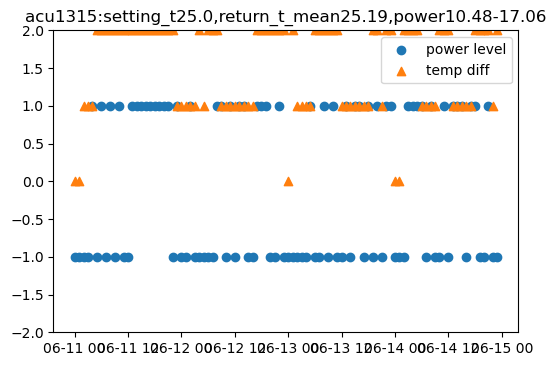

In [254]:
get_acu_df(df2_file='./-2021061/ACUpowerRJYSZID1.csv')

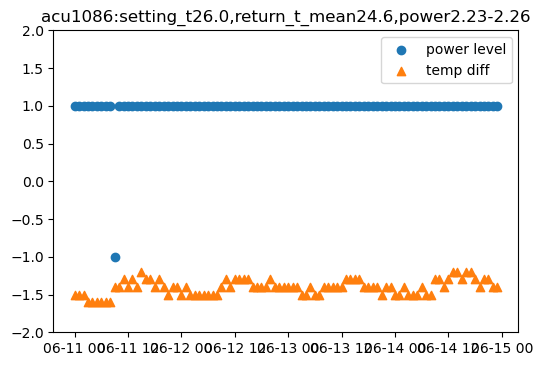

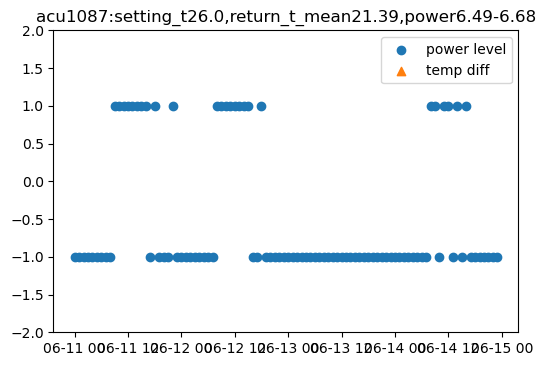

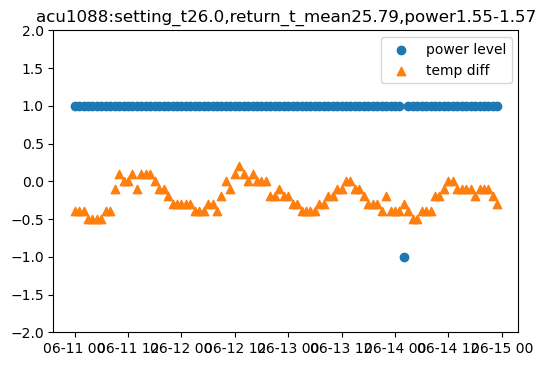

缺失该空调状态参数:1089


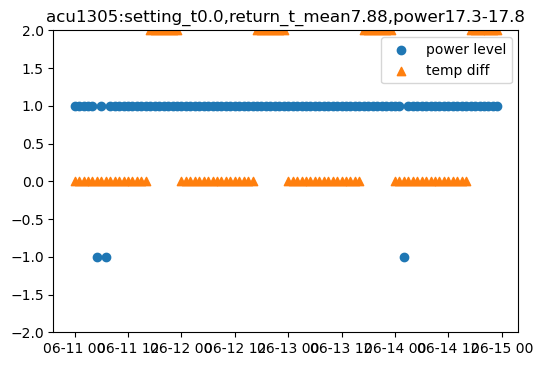

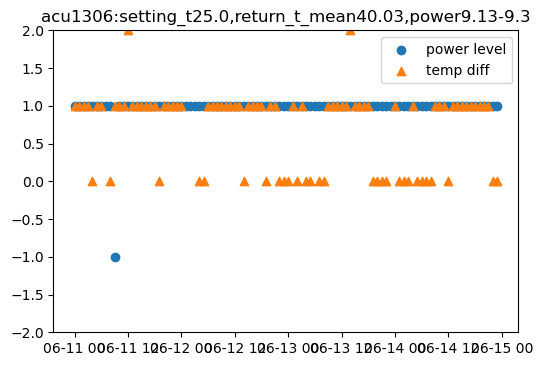

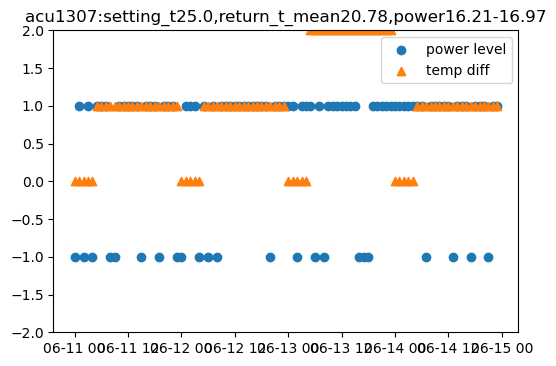

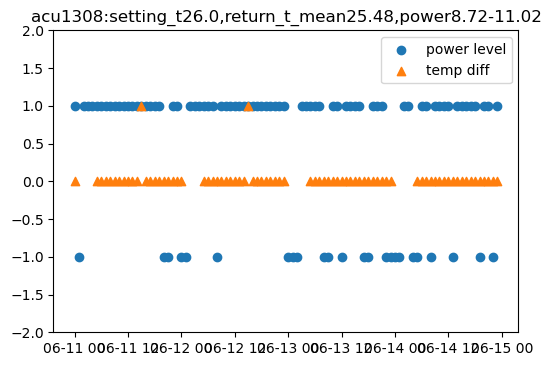

In [255]:
get_acu_df(df2_file='./-2021061/ACUpowerRJYSZID2.csv')

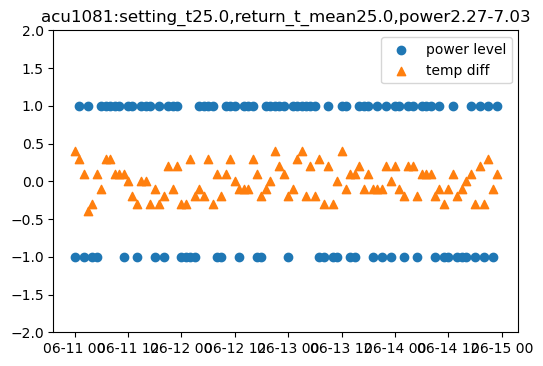

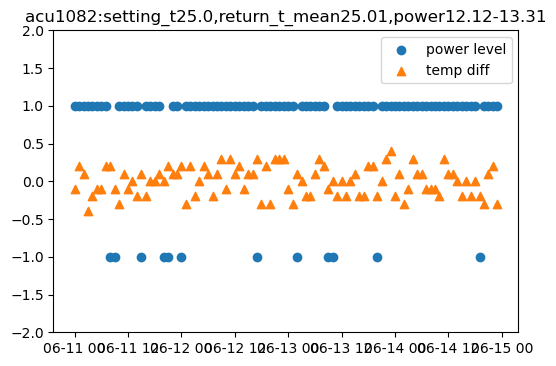

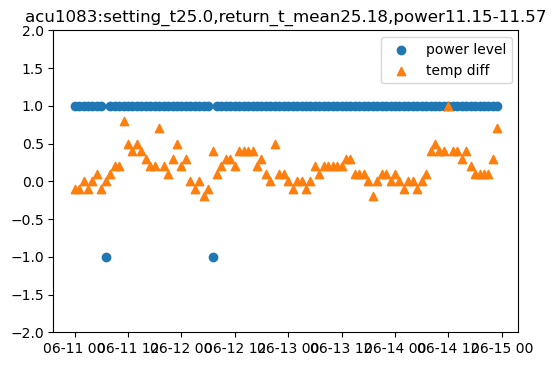

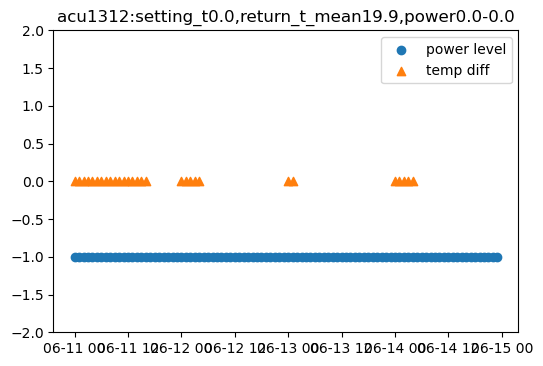

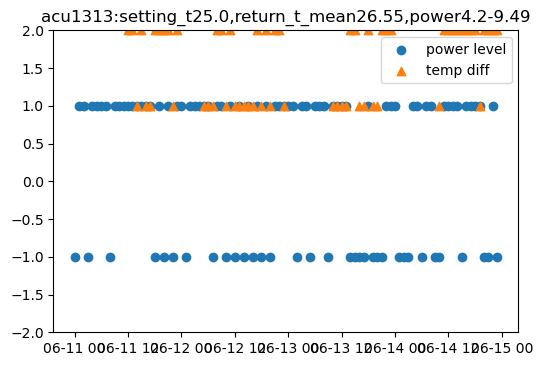

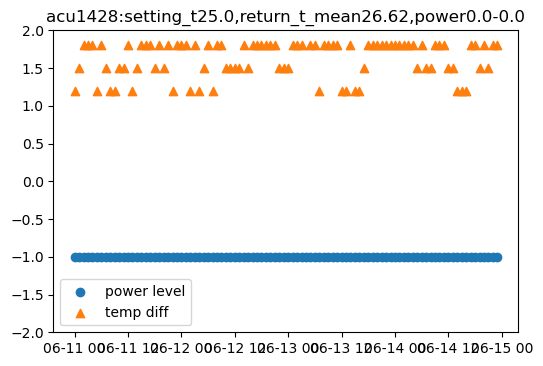

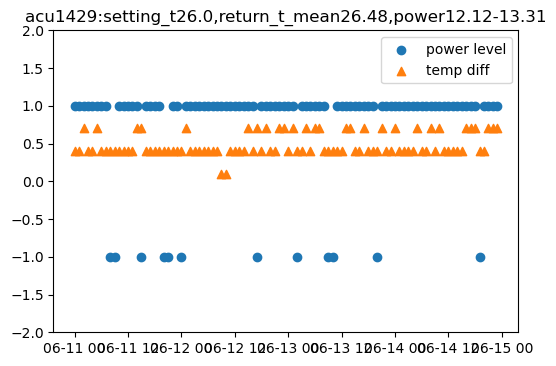

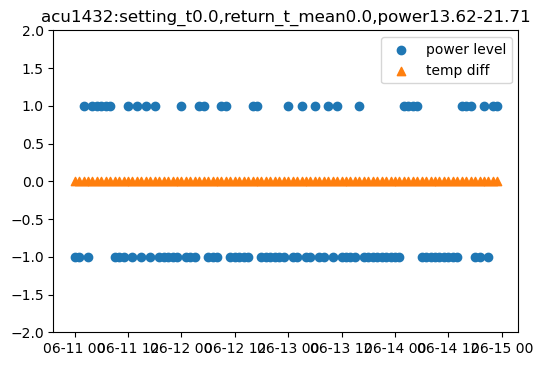

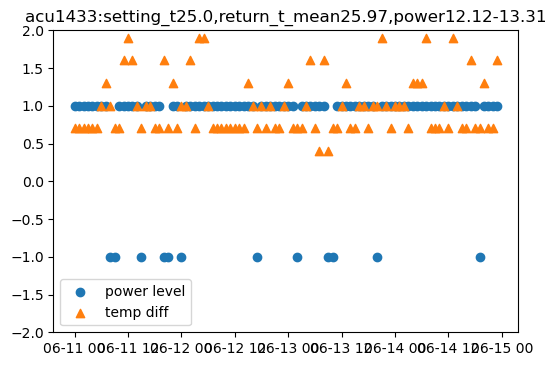

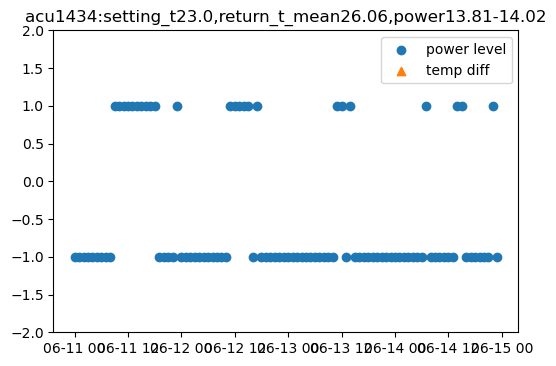

In [256]:
get_acu_df(df2_file='./-2021061/ACUpowerRJYSZID3.csv')

缺失该空调状态参数:1302


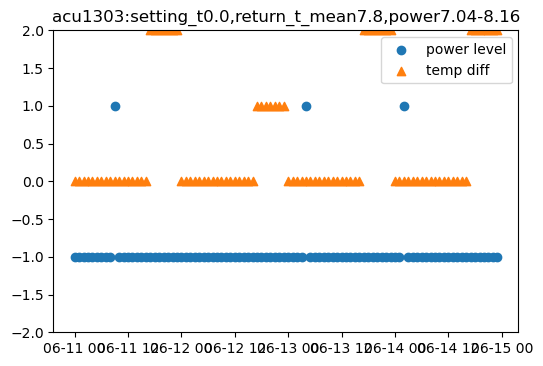

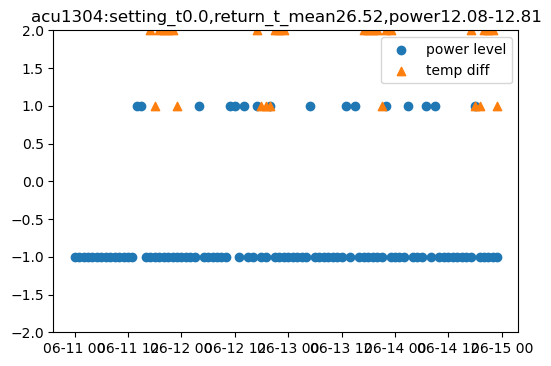

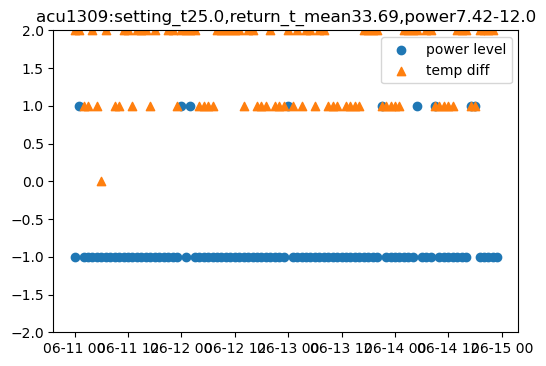

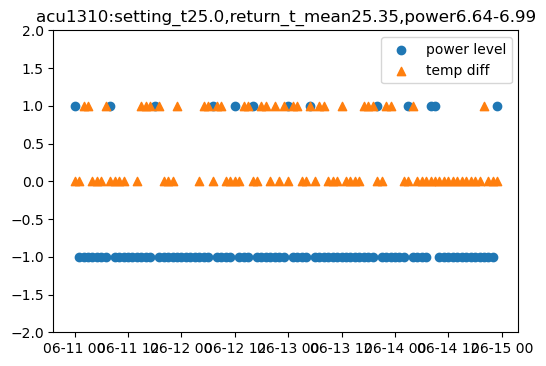

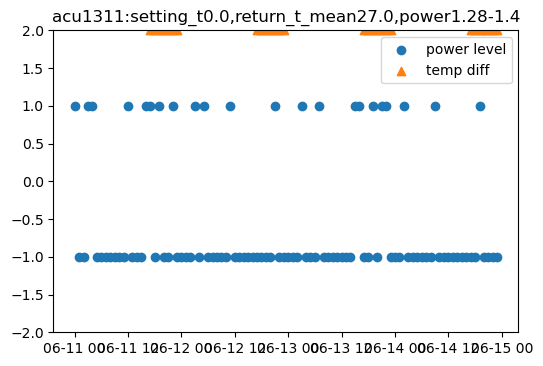

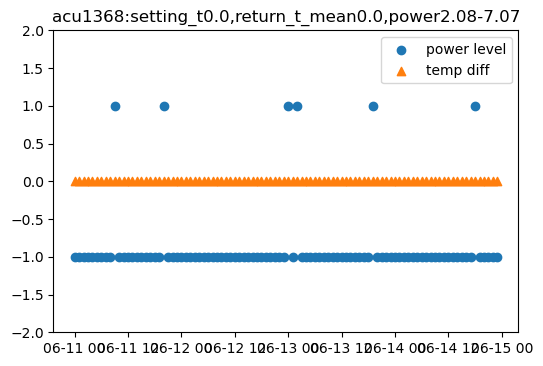

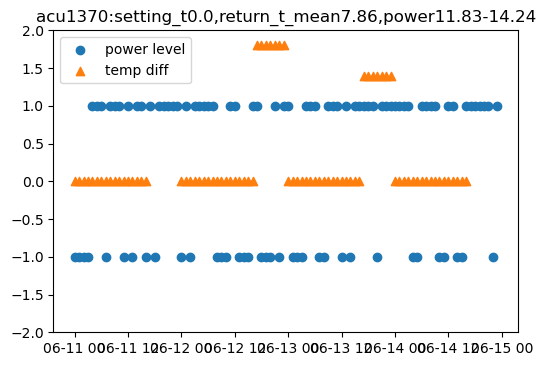

In [257]:
get_acu_df(df2_file='./-2021061/ACUpowerRJYSZID4.csv')

## 结论
* 只有少数空调的实时回风温度与实时功率的波动显示出一定的相关性。
* 可以看到前三个机房里，大部分空调回风温差（实时回风温度-设定回风温度）保持在[-0.5,+0.5],空调功率在高低两档之间切换
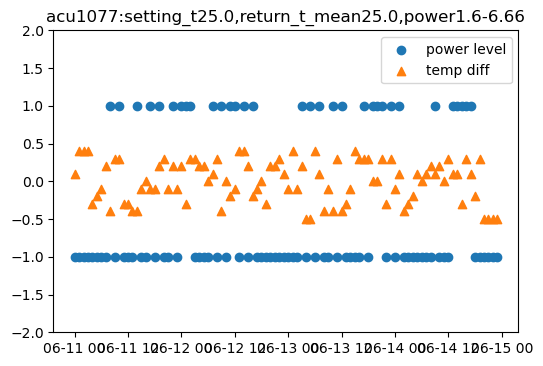
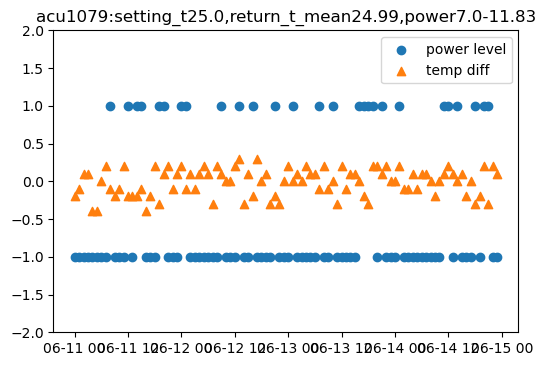
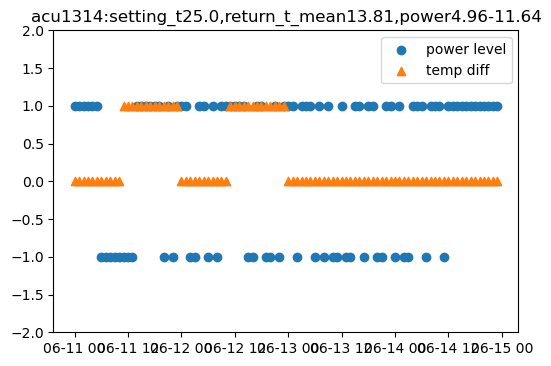
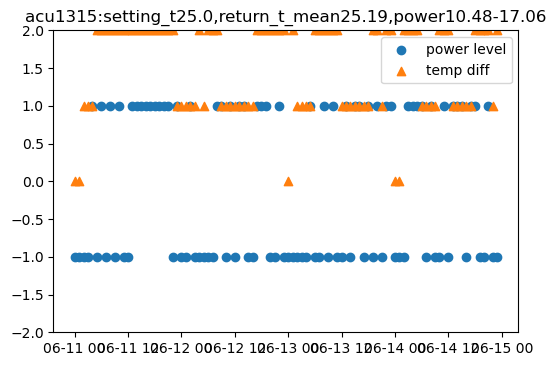
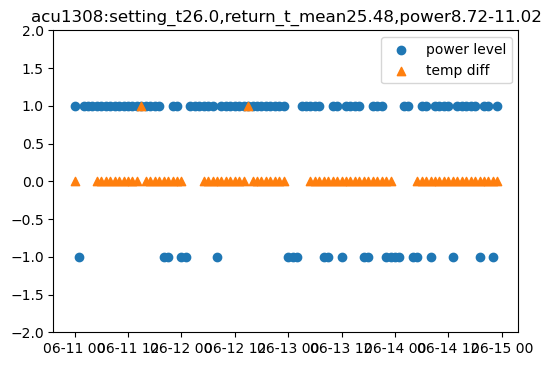
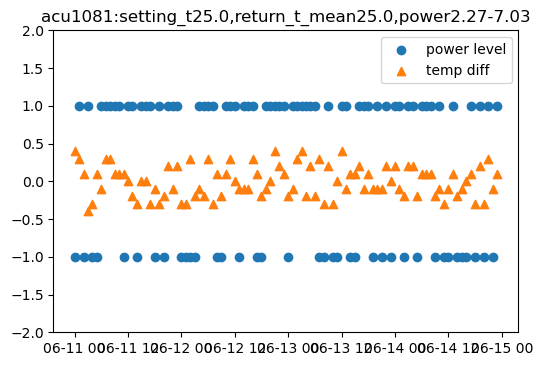
* 空调回风温差大于0（即实时回风温度较高时）。空调功率大部分时间保持在高档
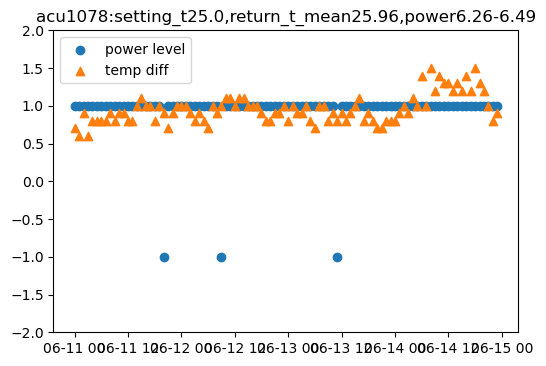
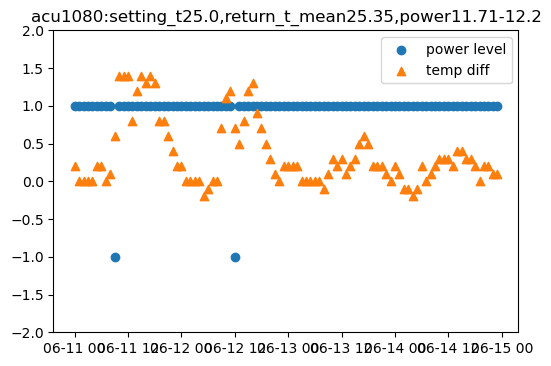
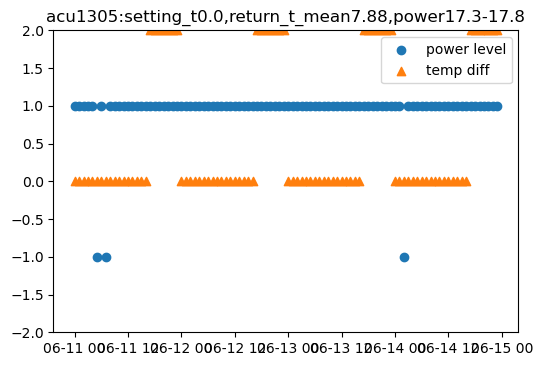
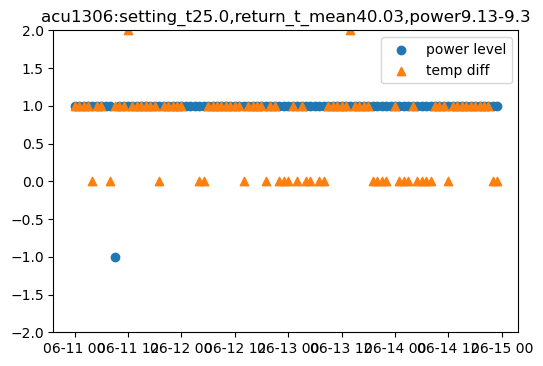
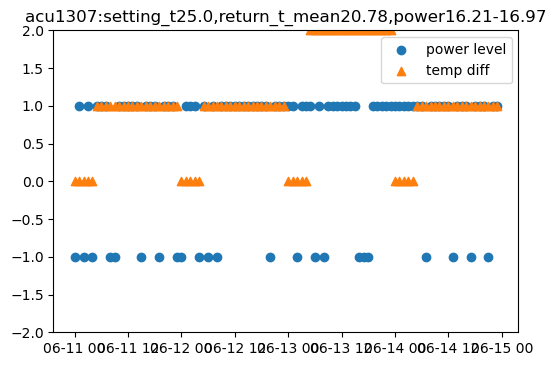
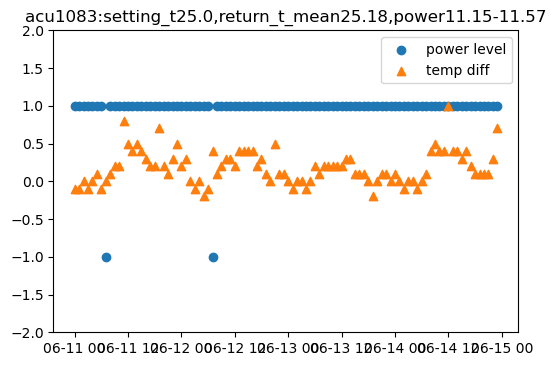
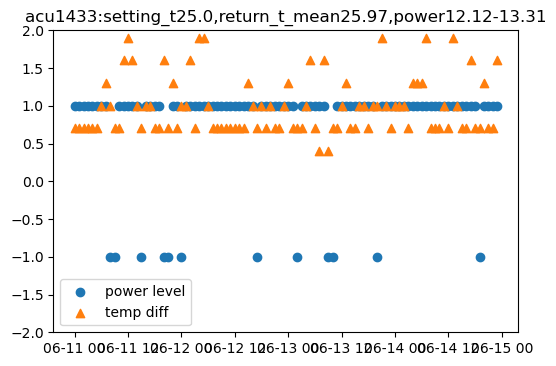

* 机房4由于安装了变频器大多数时间保持在低档位
## 存在的问题
* 有些空调的回风温度可能是错误的
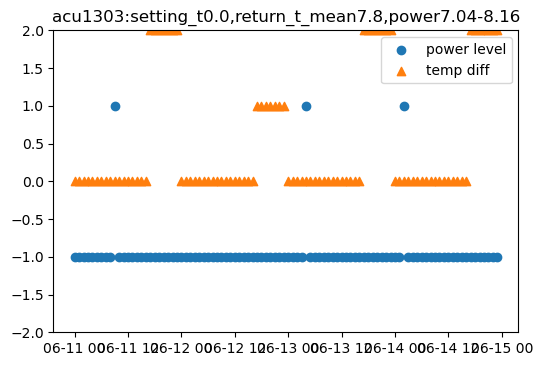
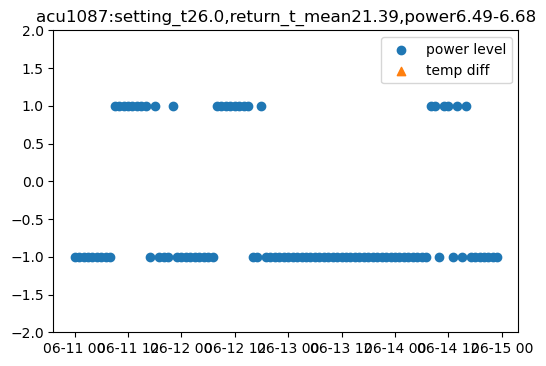
* 有些空调的功率可能是错误的，表现在有几台功率完全相同
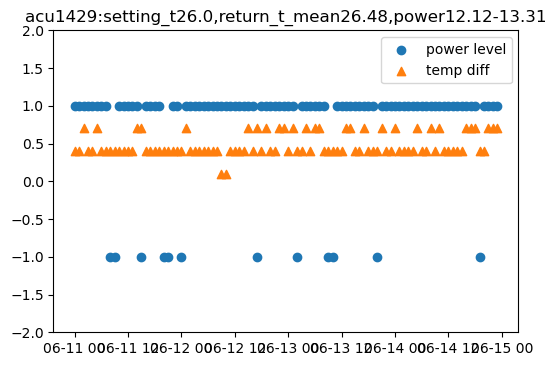
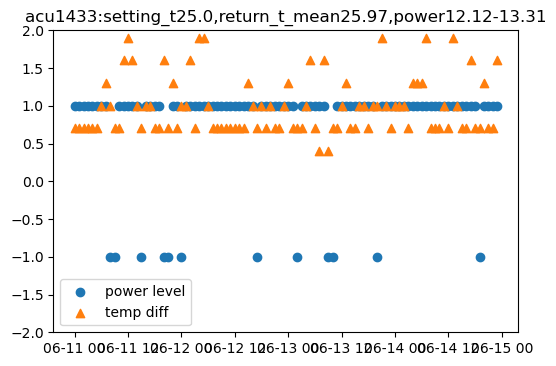
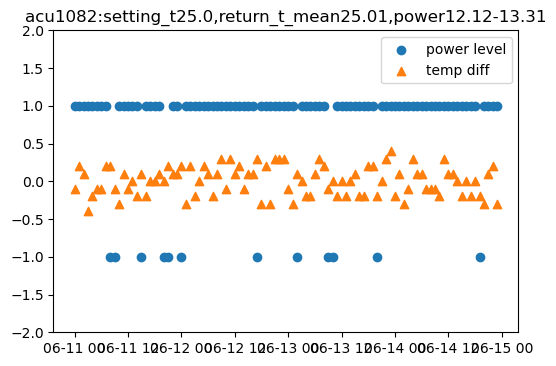
* 也存在回风温差小于0.功率在高档的情况。
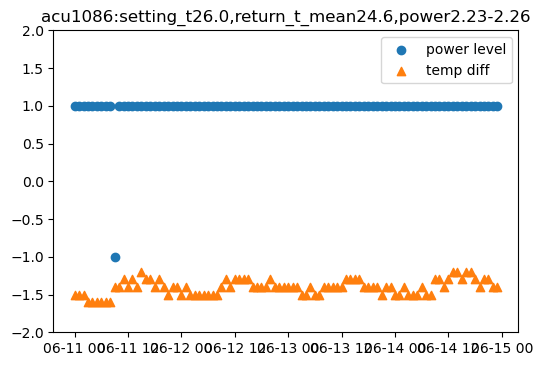
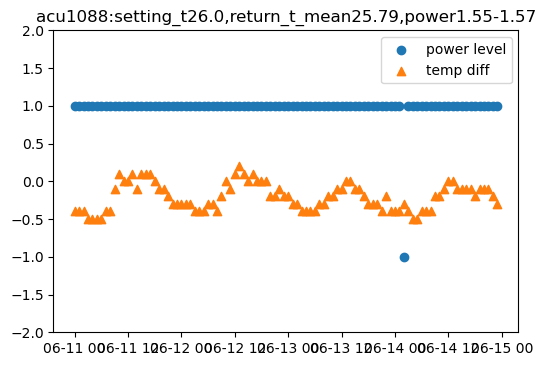
